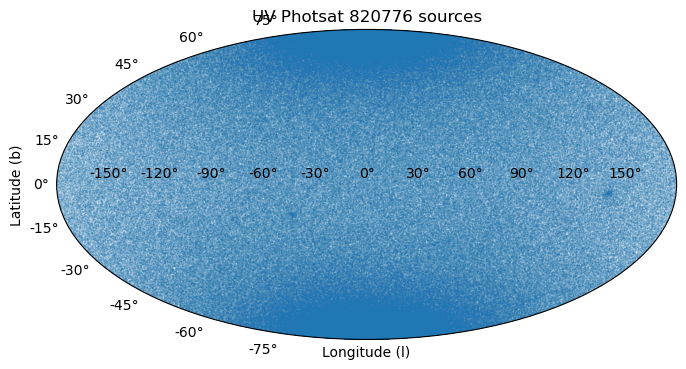

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, Galactic
import astropy.units as u

# Leer el archivo CSV con los resultados
results_df = pd.read_csv('distancias_estrellas_UV.csv')

# Convertir coordenadas a formato Galactic
coords_icrs = SkyCoord(ra=results_df['Star_RA'].values * u.deg, 
                       dec=results_df['Star_DEC'].values * u.deg, 
                       frame='icrs')
coords_galactic = coords_icrs.transform_to(Galactic)

# Extraer coordenadas y distancias
l = coords_galactic.l.deg
b = coords_galactic.b.deg
distances = results_df[results_df['Distance_Degrees']!=np.inf]["Distance_Degrees"].values

# Crear la figura y el eje
fig, ax = plt.subplots(subplot_kw={'projection': 'aitoff'})

# Scatter plot de las estrellas
sc = ax.scatter(l, b, #c=distances/np.max(distances), 
                s=1, edgecolor='none', alpha=0.1)

# Añadir colorbar
#cbar = plt.colorbar(sc, ax=ax, orientation='vertical')
#cbar.set_label('Distancia (grados)')
#cbar.set_ticks([0, max(distances)])
#cbar.ax.tick_params(labelsize=8)

# Añadir título y etiquetas
ax.set_title(f'UV Photsat {len(distances)} sources')
ax.set_xlabel('Longitude (l)')
ax.set_ylabel('Latitude (b)')

# Mostrar el plot
plt.show()

In [189]:
fov = 8
hpix=2048
vpix=2048

pixsize=fov/hpix

In [190]:
plt.rcParams["figure.figsize"] = (10,10)

In [191]:
plt.plot?

Signature:
plt.plot(
    *args: 'float | ArrayLike | str',
    scalex: 'bool' = True,
    scaley: 'bool' = True,
    data=None,
    **kwargs,
) -> 'list[Line2D]'
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yie

(-5.0, 820781.0)

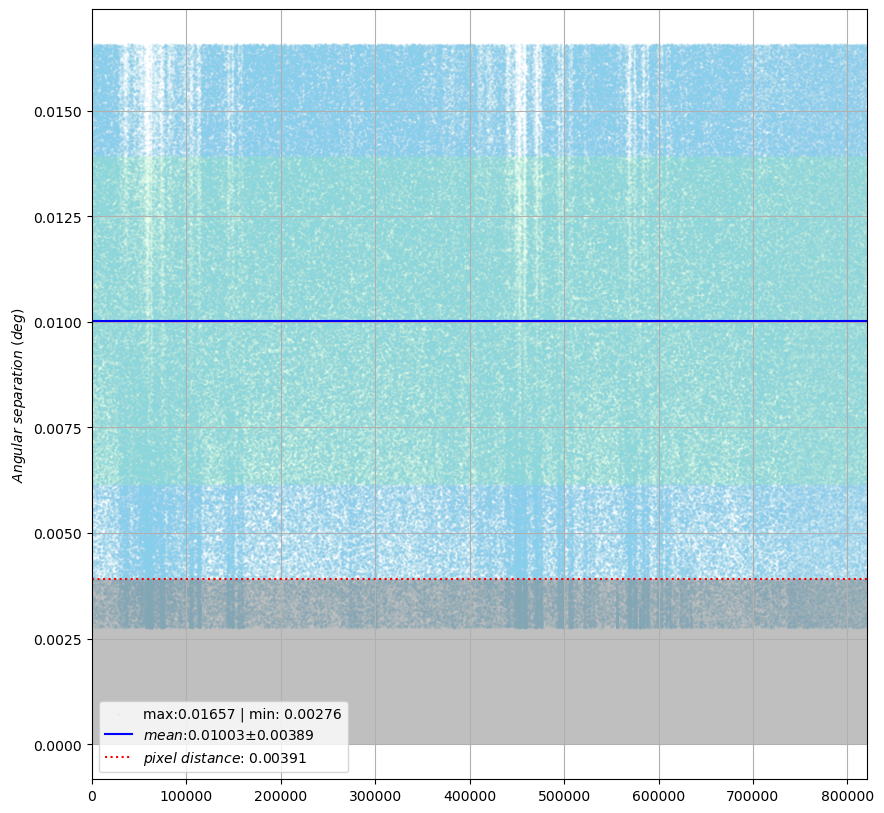

In [192]:
plt.scatter(range(len(distances)),distances,label=f"max:{np.max(distances):.5f} | min: {np.min(distances):.5f}", alpha=0.1, s=1, c="skyblue")

plt.axhline(y= np.mean(distances), xmin=0, xmax=len(distances), color="blue", label=r"$mean$"+f":{np.mean(distances):.5f}"+r"$\pm$"+f"{np.std(distances):.5f}")

plt.fill_between(np.arange(-100, len(distances)+100), np.mean(distances)+np.std(distances), np.mean(distances)-np.std(distances), facecolor='palegreen', alpha=0.2)


plt.axhline(y = pixsize, xmin=0, xmax=len(distances), color="red", linestyle=":", 
            label=r"$pixel\ distance$"+f": {pixsize:.5f}")

plt.fill_between(np.arange(-100, len(distances)+100), 0, pixsize, facecolor='grey', alpha=0.5)


plt.legend(loc=0)
plt.grid()

plt.ylabel(r"$Angular\ separation\ (deg)$")

plt.xlim(-5, len(distances)+5)

In [193]:
np.mean(distances)-np.std(distances)

0.0061434596679626466

In [194]:
pixsize

0.00390625

In [195]:
dist_pix = distances[distances<pixsize]

In [196]:
len(dist_pix)

53917

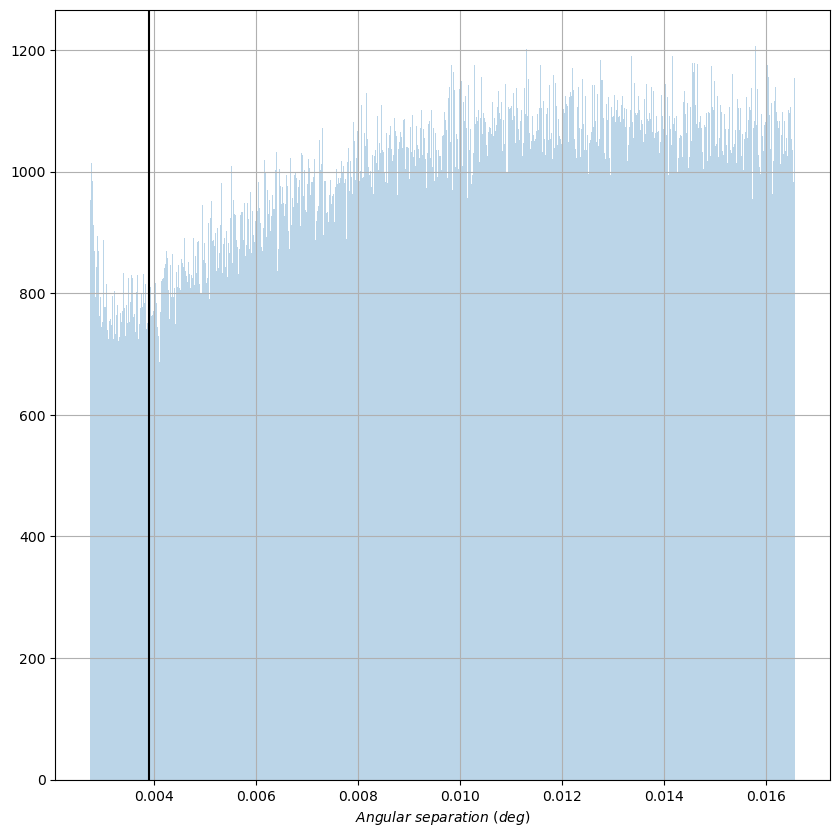

In [197]:
plt.hist(distances, alpha=0.3, bins=len(distances)//1000)
plt.axvline(pixsize, color="black")
plt.xlabel(r"$Angular\ separation\ (deg)$")
plt.grid()

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Text
from IPython.display import clear_output
import ipywidgets as widgets
from numba import jit

data = distances/pixsize

plt.rcParams["figure.figsize"] = (8,8)

In [199]:
#PLOTTER
# Function to update the histogram and statistics

def update_histogram(split_value, fov_selector):

    #PSF 2D
    # Parameters
    array_size = 50  # Size of the pixel array (100x100 pixels)
    psf_size = split_value/np.sqrt(2)  # Controls the spread of the PSF (like standard deviation)
    amplitude = 1  # Peak amplitude of the PSF

    # Create a pixel grid
    dif = 10
    x = np.linspace(-6, 6, array_size)
    #y = np.linspace(-array_size//dif, array_size//dif, array_size)
    #x, y = np.meshgrid(x, y)

    # Define a 2D Gaussian to represent the PSF
    psf = amplitude * np.exp(-(x**2) / (2 * psf_size**2))

    # Plot the PSF over the pixel array
    #fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 6))
    
    

    #HISTOGRAM
    pixsize = float(fov_selector)/2048

    data = distances/pixsize
    # Clear the current plot
    clear_output(wait=True)
    
    # Split the data into two slices based on the split_value
    slice1 = data[data <= split_value]
    slice2 = data[data > split_value]

    lenslice1 = len(slice1)
    lenslice2 = len(slice2)
    lendata   = len(data)

    slice1_perc = lenslice1/lendata*100
    slice2_perc = lenslice2/lendata*100

    # Calculate statistics for each slice
    slice1_mean, slice1_std = np.mean(slice1), np.std(slice1)
    slice2_mean, slice2_std = np.mean(slice2), np.std(slice2)
    

    
    fig = plt.figure(figsize=(8, 8))  
    gs = fig.add_gridspec(2,2)
      
    ax_hist = fig.add_subplot(gs[1,:])
    ax_psf = fig.add_subplot(gs[0,1])
    ax_psf.plot(x,
                #y, 
                psf, 
                #cmap=cm.viridis, edgecolor='none'
                )
    ax_psf.set_title("PSF")
    ax_psf.set_xlabel("Pixel")
    ax_psf.set_ylabel("")

    ax_psf.grid(True, which="major", color="k")
    #ax.grid(True, which='minor', color='gray', linestyle='--', linewidth=0.5)
    #ax_psf.set_zlabel("Amplitude")
    
    # Plot the histogram
    ax_hist.hist(data, bins=30, alpha=0.2, color="skyblue", label=f"All Data | {lendata} sources")
    
    # Add vertical line to show the split
    ax_hist.axvline(x=split_value, color='r', linestyle='--')
    
    # Plot histograms of the two slices

    ax_hist.hist(slice1, bins=30, alpha=0.2, color='red', label=f"Inside PSF: {len(slice1)} sources | ({slice1_perc:.2f})%")
    ax_hist.hist(slice2, bins=30, alpha=0.2, color='green', label=f"Outside PSF: {len(slice2)} sources| ({slice2_perc:.2f})%")
    
    
    
    # Display statistics
    stats_text = (f'Inside PSF [{slice1_perc:.2f}%] (<= {split_value:.2f} pixel):\n'
                  f'Mean = {slice1_mean:.2f}, Std Dev = {slice1_std:.2f}\n\n'
                  f'Outside PSF [{slice2_perc:.2f}%](> {split_value:.2f} pixel):\n'
                  f'Mean = {slice2_mean:.2f}, Std Dev = {slice2_std:.2f}')
    
    ax_hist.set_title(stats_text)
    ax_hist.legend()
    ax_hist.set_xlabel(r"$Angular\ separation\ (Pixel)$")
    ax_hist.set_ylabel("Frequency")
    ax_hist.set_xlim(0,4)
    ax_hist.grid()
    
    # Show the updated plot
    plt.tight_layout()
    fig.canvas.draw_idle()

# Create the interactive slider
split_slider = FloatSlider(min=0.4, max=4, step=0.01, value=np.median(data), description='PSF Scale')
fov_selector = FloatSlider(min=6, max=8, step = 0.1, description='FOV:', value='6', placeholder='Enter FOV in degrees')

# Use the interactive widget to update the plot
interact(update_histogram, split_value=split_slider, fov_selector=fov_selector)


interactive(children=(FloatSlider(value=2.6058520179005695, description='PSF Scale', max=4.0, min=0.4, step=0.…

<function __main__.update_histogram(split_value, fov_selector)>

In [200]:
psf_list = np.arange(1,2.5 ,0.25)
fov_list = [6,7,8]
total = 466024
in_list  = np.array([[8901,42594, 77210, 113704, 152592, 193203],
            [31280, 71305, 113704, 159129, 207021, 256517],
            [53917, 101420, 152592, 207021, 263600, 323094]
            ])
out = total-in_list



In [201]:
import numpy as np

In [202]:
coef = []
for i in np.arange(len(in_list)):
    coef.append(
        np.polyfit(psf_list, in_list[i], 2)
        )

In [203]:
pol = [np.poly1d(c) for c in coef]

In [204]:
x = np.linspace(min(psf_list), max(psf_list), 100)
y = [p(x) for p in pol]

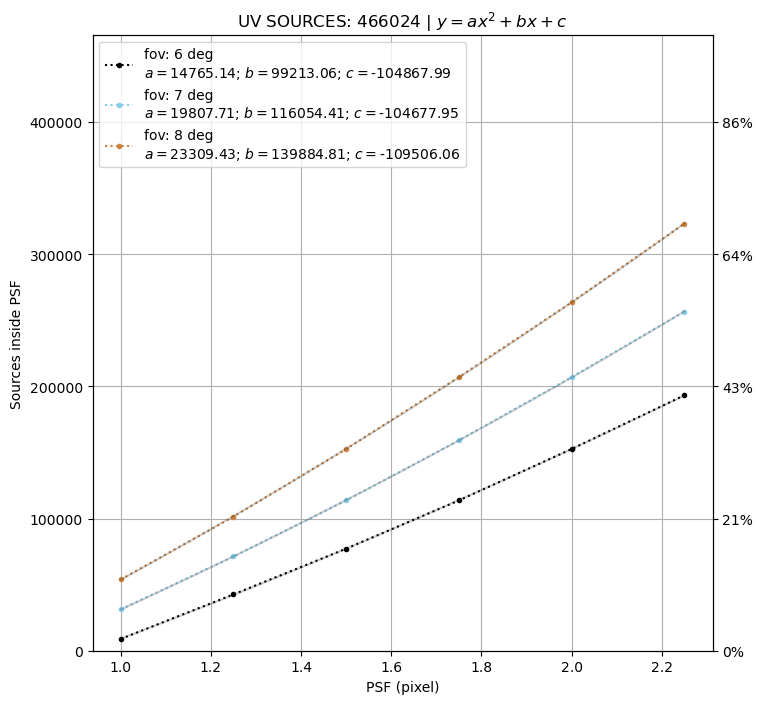

In [205]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
ax.set_title(f"UV SOURCES: {total} | " + r"$y=ax^2+bx +c$")

ax.plot(psf_list, in_list[0], ".:", color="black",
label = f"fov: {fov_list[0]} deg\n" + r"$a=$"+f"{coef[0][0]:.2f}; " + r"$b=$"+f"{coef[0][1]:.2f}; " + r"$c=$"+f"{coef[0][2]:.2f}")
ax.plot(x, y[0], "-", color="black", alpha = 0.2)



ax.plot(psf_list, in_list[1], ".:", color="skyblue",
label = f"fov: {fov_list[1]} deg\n" + r"$a=$"+f"{coef[1][0]:.2f}; " + r"$b=$"+f"{coef[1][1]:.2f}; " + r"$c=$"+f"{coef[1][2]:.2f}")
ax.plot(x, y[1], "-", color="black", alpha = 0.2)

ax.plot(psf_list, in_list[2], ".:", color="peru",
label = f"fov: {fov_list[2]} deg\n" + r"$a=$"+f"{coef[2][0]:.2f}; " + r"$b=$"+f"{coef[2][1]:.2f}; " + r"$c=$"+f"{coef[2][2]:.2f}")
ax.plot(x, y[2], "-", color="black", alpha = 0.2)


axtwin = ax.twinx()
ax.set_xlabel("PSF (pixel)")
ax.set_ylabel("Sources inside PSF")
ax.set_ylim(0,total)
axtwin.set_ylim(0,total)
axtwin.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=total))

ax.grid()
ax.legend(loc=2)

In [206]:
for i in range(len(fov_list)):
    print(f"fov={fov_list[i]}: {in_list[i]}")

fov=6: [  8901  42594  77210 113704 152592 193203]
fov=7: [ 31280  71305 113704 159129 207021 256517]
fov=8: [ 53917 101420 152592 207021 263600 323094]


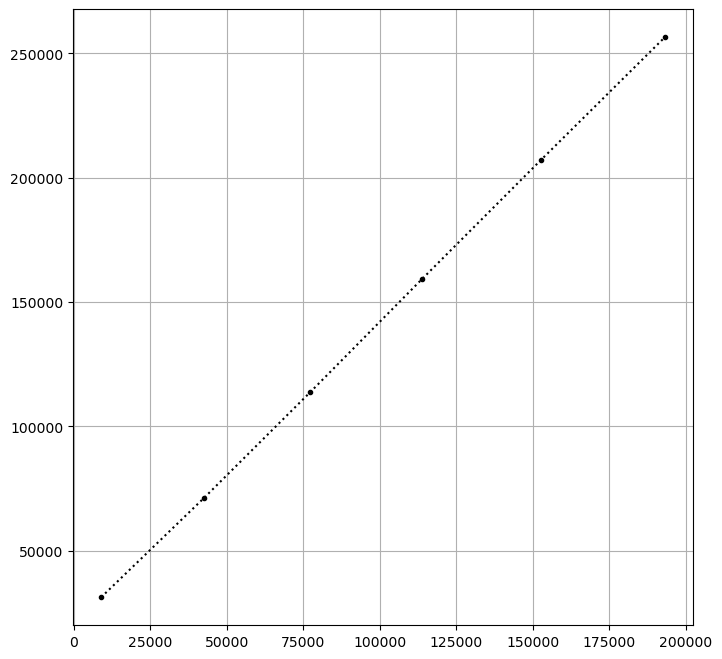

In [207]:
plt.plot(in_list[0], in_list[1], ".:k")
plt.grid()